In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler
def get_train_test(url):
    data = pd.read_csv(url, header=0, parse_dates=['Month'], index_col='Month')

    data = data.sort_index()

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values)
    split_point = int(len(scaled_data) * 0.8)

    train_data = scaled_data[:split_point]
    test_data = scaled_data[split_point:]

    return train_data, test_data

In [4]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data = get_train_test(sunspots_url)

X_train = train_data[:-1]
y_train = train_data[1:]

X_test = test_data[:-1]
y_test = test_data[1:]

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(64, input_shape=(None, 1), return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=20, batch_size=32)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Epoch 1/20
71/71 [==============================] - 2s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0826
Epoch 2/20
71/71 [==============================] - 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0478
Epoch 3/20
71/71 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0446
Epoch 4/20
71/71 [==============================] - 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0456
Epoch 5/20
71/71 [==============================] - 0s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0450
Epoch 6/20
71/71 [==============================] - 0s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0446
Epoch 7/20
71/71 [==============================] - 0s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0447
Epoch 8/20
71/71 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0451
Epoch 9/20
71/71 [==============================] - 0s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0447
Epoch 10/20
71/71 [

Train RMSE: 0.063 RMSE
Test RMSE: 0.078 RMSE


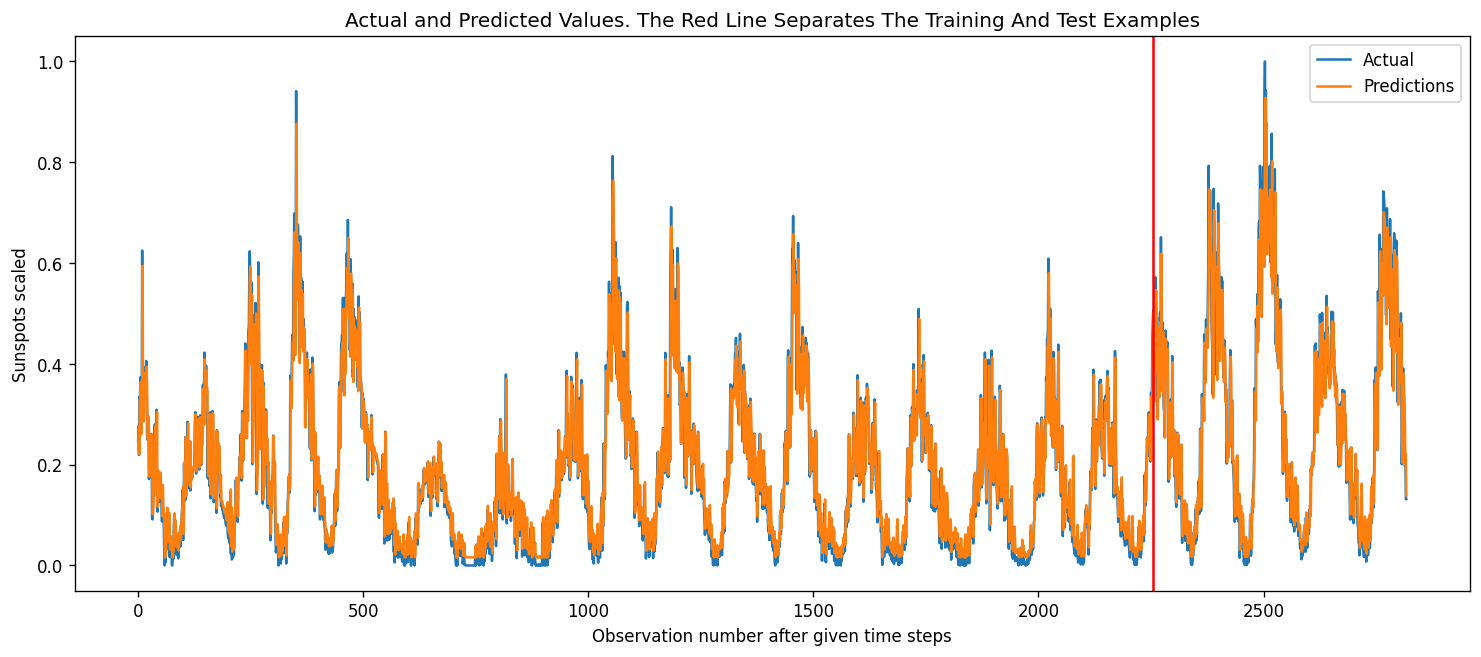

In [6]:
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

# Print RMSE
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))

# Plot the results
actual = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)
rows = len(actual)
plt.figure(figsize=(15, 6), dpi=120)
plt.plot(range(rows), actual)
plt.plot(range(rows), predictions)
plt.axvline(x=len(y_train), color='r')
plt.legend(['Actual', 'Predictions'])
plt.xlabel('Observation number after given time steps')
plt.ylabel('Sunspots scaled')
plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plt.show()
